#### Importing Libs

In [1]:
from core.PipelineProject import PrepareDataAndTrainingModels
from core.SQLeto import SQLeto
from decouple import config
from sklearn.metrics import (f1_score,
                    roc_auc_score,
                    recall_score,
                    precision_score,
                    roc_curve)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load enviroment vars

In [2]:
RAW_DATA_PATH = config('RAW_DATA_PATH')
DATABASE_POSTGRES = config('DATABASE_POSTGRES')
USER_POSTGRES = config('USER_POSTGRES')
PWD_POSTGRES = config('PWD_POSTGRES')

#### Load data from POTSGRES

In [3]:
# Create object to access database
sqleto = SQLeto(
    database=DATABASE_POSTGRES, 
    user=USER_POSTGRES,
    password=PWD_POSTGRES)
    
# Getting data in a dataframe
data = sqleto.execute_DQL(
    '''
        SELECT * FROM creditcard
    '''
)

#### Load models

In [4]:
# Models to test
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#### Load scaler

In [5]:
# Scaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

#### Load balancer

In [6]:
# Balancers
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN

#### Use Pipeline to avaliate Models

In [7]:
prep = PrepareDataAndTrainingModels(
    dataframe=data,
    target="Class",
    scaler=StandardScaler(),
    models=[
        MLPClassifier(),
        DecisionTreeClassifier(),
        XGBClassifier(),
        GradientBoostingClassifier(),
        LogisticRegression(),
        RandomForestClassifier()],
    balancer = None,
    score_metric = (f1_score,
                    roc_auc_score,
                    recall_score,
                    precision_score)
)
prep.splitting_data()
prep.fit_models()
prep.compute_scores()

,model,f1_score,roc_auc_score,recall_score,precision_score
0,MLPClassifier,0.563452,0.907227,0.816176,0.430233
1,DecisionTreeClassifier,0.741259,0.889448,0.779412,0.706667
2,XGBClassifier,0.890625,0.919082,0.838235,0.950000
3,GradientBoostingClassifier,0.219355,0.562488,0.125000,0.894737
4,LogisticRegression,0.644928,0.826907,0.654412,0.635714
5,RandomForestClassifier,0.877470,0.908053,0.816176,0.948718


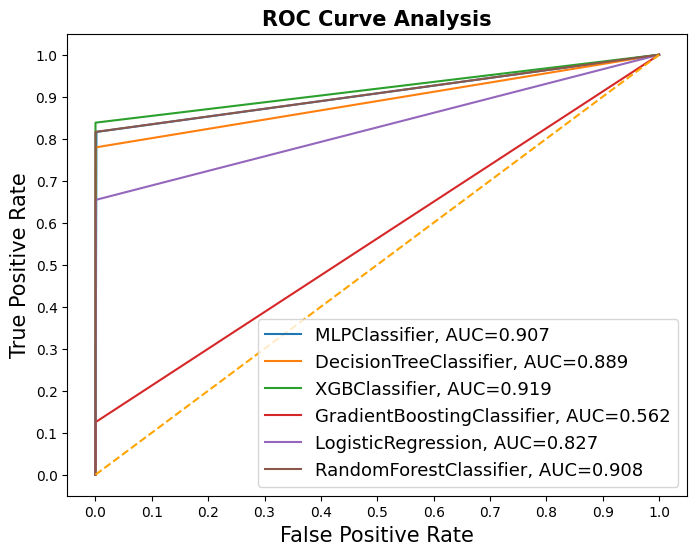

In [8]:
prep.plot_roc_curves()

#### With Balancer SMOTE

In [9]:
prep_2 = PrepareDataAndTrainingModels(
    dataframe=data,
    target="Class",
    scaler=StandardScaler(),
    models=[
        MLPClassifier(),
        DecisionTreeClassifier(),
        XGBClassifier(),
        GradientBoostingClassifier(),
        LogisticRegression(),
        RandomForestClassifier()],
    balancer = SMOTE(),
    score_metric = (f1_score,
                    roc_auc_score,
                    recall_score,
                    precision_score)
)
prep_2.splitting_data()
prep_2.splitting_data()
prep_2.fit_models()
prep_2.compute_scores()

,model,f1_score,roc_auc_score,recall_score,precision_score
0,MLPClassifier,0.056338,0.514694,0.029412,0.666667
1,DecisionTreeClassifier,0.750000,0.896801,0.794118,0.710526
2,XGBClassifier,0.890625,0.919082,0.838235,0.950000
3,GradientBoostingClassifier,0.219355,0.562488,0.125000,0.894737
4,LogisticRegression,0.644928,0.826907,0.654412,0.635714
5,RandomForestClassifier,0.871595,0.911712,0.823529,0.925620


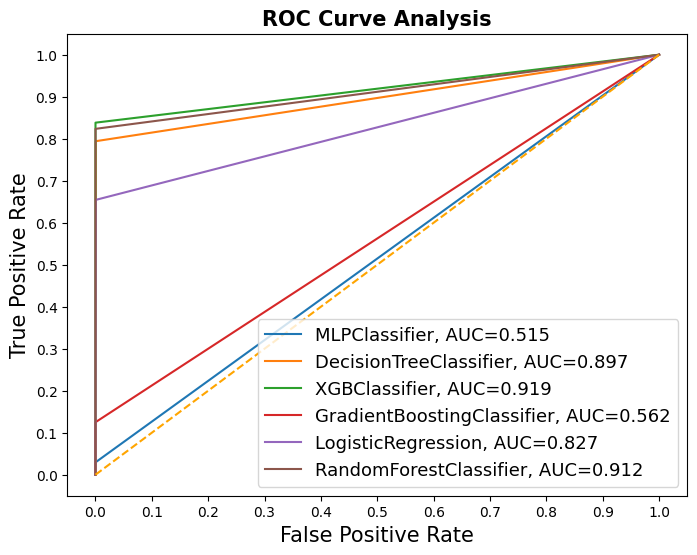

In [10]:
prep_2.plot_roc_curves()

In [11]:
prep_3 = PrepareDataAndTrainingModels(
    dataframe=data,
    target="Class",
    scaler=StandardScaler(),
    models=[
        MLPClassifier(),
        DecisionTreeClassifier(),
        XGBClassifier(),
        GradientBoostingClassifier(),
        LogisticRegression(),
        RandomForestClassifier()],
    balancer = AllKNN(),
    score_metric = (f1_score,
                    roc_auc_score,
                    recall_score,
                    precision_score)
)
prep_3.splitting_data()
prep_3.splitting_data()
prep_3.fit_models()
prep_3.compute_scores()

,model,f1_score,roc_auc_score,recall_score,precision_score
0,MLPClassifier,0.647564,0.914855,0.830882,0.530516
1,DecisionTreeClassifier,0.779310,0.915201,0.830882,0.733766
2,XGBClassifier,0.890625,0.919082,0.838235,0.950000
3,GradientBoostingClassifier,0.219355,0.562488,0.125000,0.894737
4,LogisticRegression,0.644928,0.826907,0.654412,0.635714
5,RandomForestClassifier,0.861660,0.900688,0.801471,0.931624


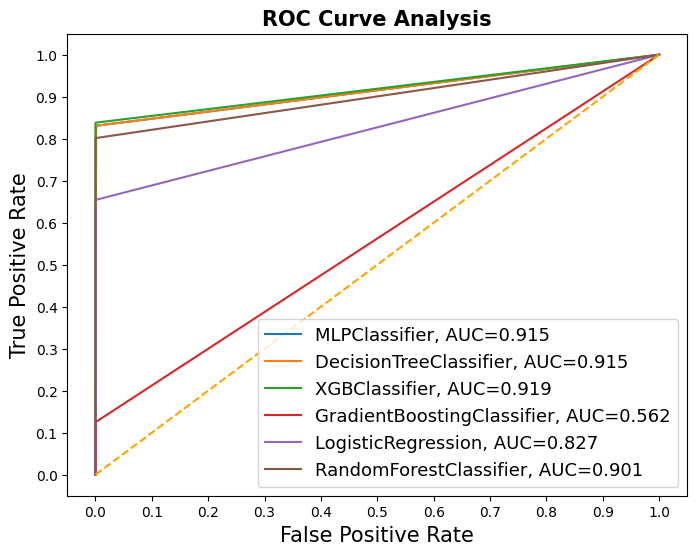

In [12]:
prep_3.plot_roc_curves()